1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import scipy.stats as ss
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, \
  accuracy_score, confusion_matrix, classification_report

plt.style.use('ggplot')
warnings.simplefilter("ignore")

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')


In [4]:
# cd /content/drive/MyDrive/TH_NMMH/Week 02

In [5]:
PATH = 'heart.csv' # Path to your file

df = pd.read_csv(PATH)
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


In [6]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang',
               'slope', 'ca', 'thal', 'target']
numerical = ['age', 'trestbps', 'thalach', 'oldpeak', 'chol']

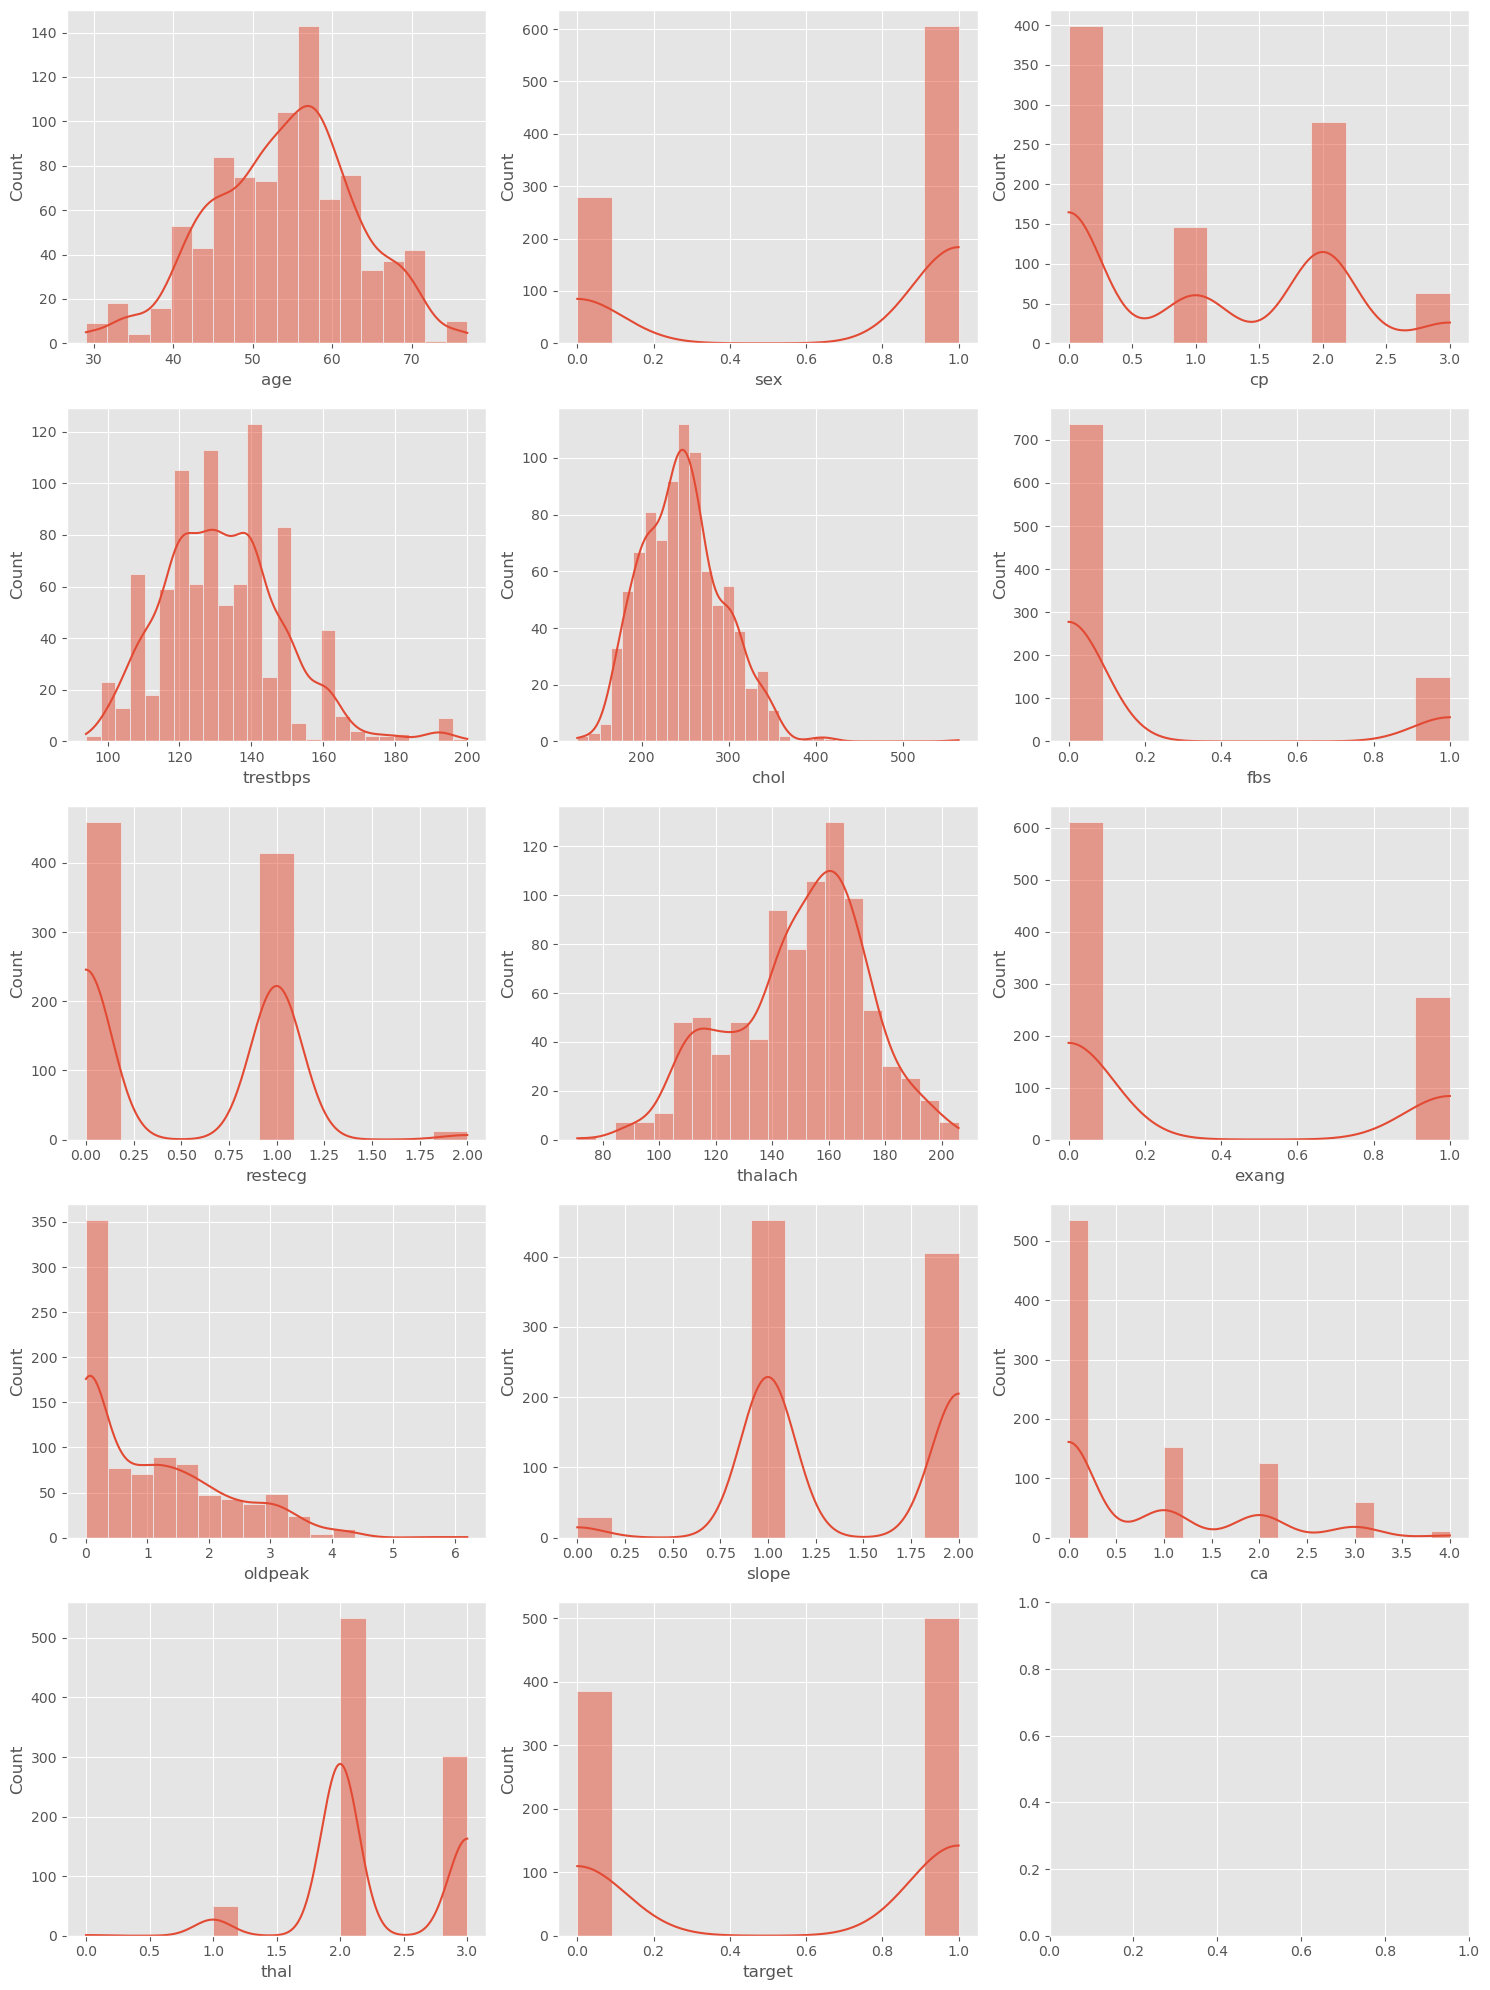

In [7]:
#ToDo: Show histogram of dataframe

fig_col = 3
fig, ax = plt.subplots(nrows=math.ceil(df.shape[1] / fig_col),
                        ncols=fig_col,
                        figsize=(15, 20))
for i, col in enumerate(df.columns):
    r, c = i // fig_col, i % fig_col
    sns.histplot(data=df, x=col, legend=False, ax=ax[r][c], kde=True)

plt.tight_layout()
plt.show()

## Data Analysis

In [8]:
# Data analysis
# Todo: analyze your data here
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.shape

(886, 14)

In [11]:
# Check null data
df.isnull().sum().sum()

0

In [12]:
# Check duplicated data
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


<Axes: >

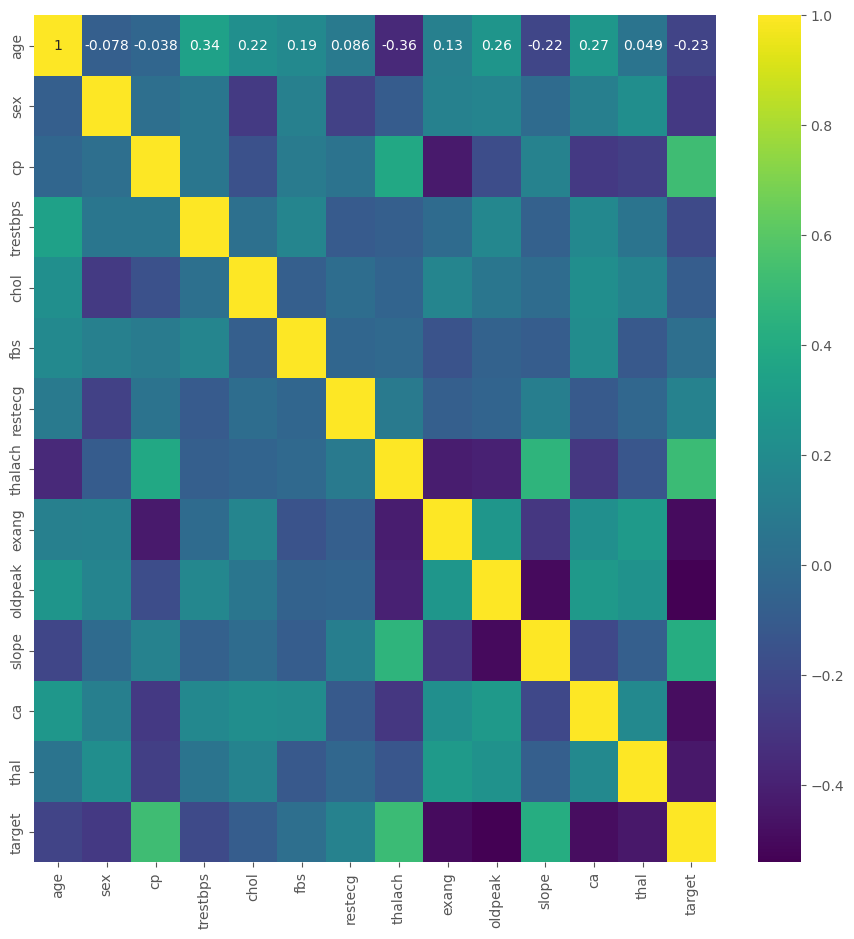

In [14]:
fig = plt.figure(figsize=(11, 11))
sns.heatmap(data=df.corr(), cmap='viridis', annot=True, annot_kws={'size':10})

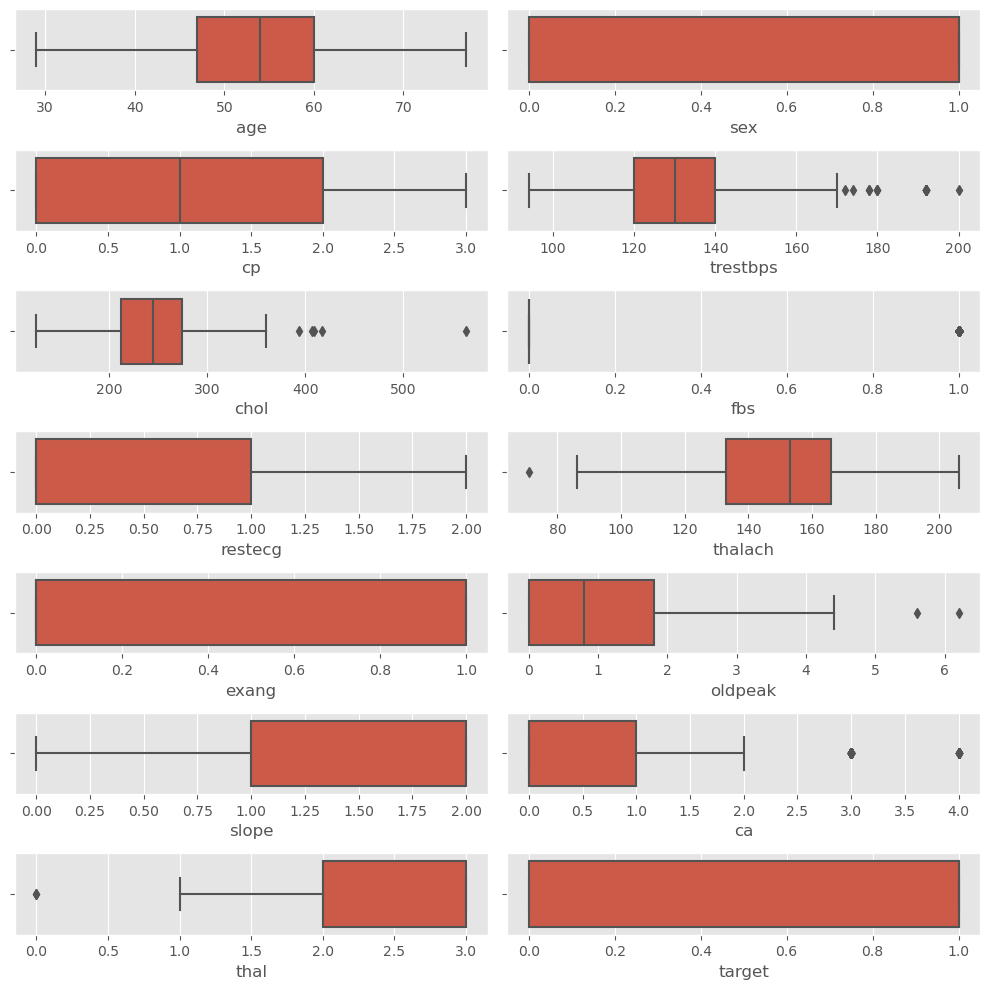

In [15]:
fig_col = 2
fig, ax = plt.subplots(nrows=math.ceil(df.shape[1] / fig_col),
                        ncols=fig_col,
                        figsize=(10, 10))
for i, col in enumerate(df.columns):
  r, c = i // fig_col, i % fig_col
  sns.boxplot(data=df, x=col, ax=ax[r][c])

plt.tight_layout()
plt.show()

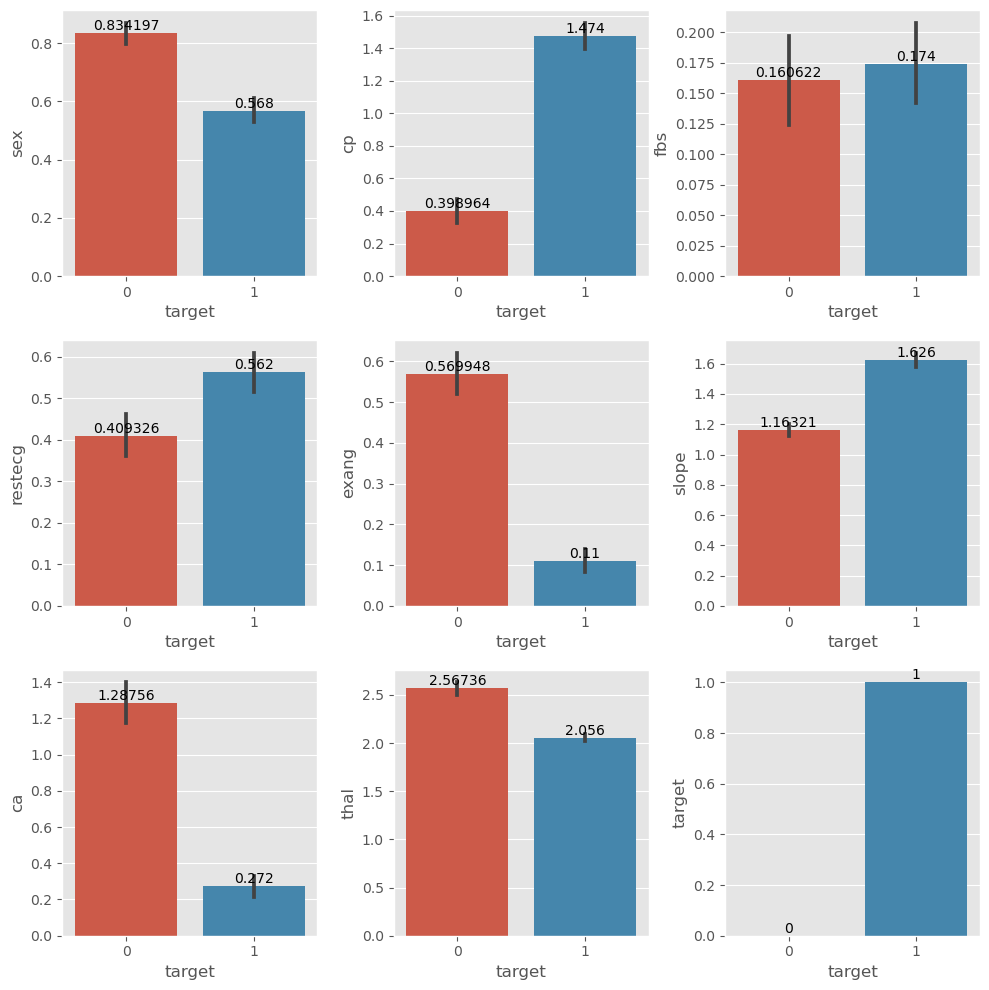

In [16]:
fig, ax = plt.subplots(nrows=3,
                        ncols=3,
                        figsize=(10, 10))
for i in range(len(categorical)):
    r, c = i // 3, i % 3
    sns.barplot(data=df, x='target', y=categorical[i], ax=ax[r][c])
    ax[r][c].bar_label(ax[r][c].containers[0], fontsize=10);

plt.tight_layout()
plt.show()

In [17]:
# Removing features having less corr value (default < 0.1)
def correlation(dataset: pd.DataFrame, corr: float = 0.1) -> pd.DataFrame:
    print('Correlation', '_' * 30)
    func_df = dataset.copy()
    col_corr = set()
    matrix_corr = dataset.corr()

    for col in matrix_corr.columns:
        if abs(matrix_corr[col][-1]) < corr:
          col_corr.add(col)
    print(col_corr)
    func_df.drop(col_corr, axis=1, inplace=True)
    print('Done', '_' * 40, '\n\n')
    return func_df

# Removing outliers by quantile_range (default (25, 75))
def remove_outlier_by_quantile(dataset: pd.DataFrame, threshold: float) -> pd.DataFrame:
    print('Remove Outliers', '_' * 30)
    func_df = dataset.copy()
    print(f'Before shape: {dataset.shape}')
    outliers = list()
    for i, col in enumerate(func_df.columns):
      Q1 = func_df[col].quantile(25 / 100) 
      Q3 = func_df[col].quantile(75 / 100)
      IQR = Q3 - Q1
      outliers.append((func_df[col] < Q1 - threshold * IQR) | (func_df[col] > Q3 + threshold * IQR))
      print(f'{dataset.columns[i]}: {outliers[i].sum()} \n')
    for i in range(1, len(outliers)):
      outliers_idx = np.bitwise_or.reduce(outliers, axis=0)
    func_df = func_df[~outliers_idx]
    print(f'After shape: {func_df.shape}')
    print('Done', '_' * 40, '\n\n')
    return func_df

In [18]:
df1 = correlation(dataset=df)
print(df1)

Correlation ______________________________
{'fbs', 'chol'}
Done ________________________________________ 


     age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  \
0     46    1   0       120        0      144      0      0.8      2   0   
1     71    0   1       160        1      162      0      0.4      2   2   
2     71    0   1       160        1      163      0      0.4      2   2   
3     71    0   1       160        1      164      0      0.4      2   2   
4     71    0   1       160        1      165      0      0.4      2   2   
..   ...  ...  ..       ...      ...      ...    ...      ...    ...  ..   
881   68    0   2       120        0      115      0      1.5      1   0   
882   44    0   2       108        1      175      0      0.6      1   0   
883   52    1   0       128        1      161      1      0.0      2   1   
884   59    1   3       160        0      125      0      0.0      2   0   
885   54    1   0       120        1      113      0    

## Preprocessing

In [19]:
def preprocessing_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    cleaned_df = df.copy()
    cleaned_df = cleaned_df.dropna()
    cleaned_df = cleaned_df.drop_duplicates()
    cleaned_df = remove_outlier_by_quantile(dataset=df, threshold=1.5)
    return cleaned_df

In [20]:
df = preprocessing_data(df)

Remove Outliers ______________________________
Before shape: (886, 14)
age: 0 

sex: 0 

cp: 0 

trestbps: 17 

chol: 5 

fbs: 149 

restecg: 0 

thalach: 1 

exang: 0 

oldpeak: 2 

slope: 0 

ca: 72 

thal: 2 

target: 0 

After shape: (668, 14)
Done ________________________________________ 




In [21]:
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Feature Engineering

Correlation ______________________________
{'chol'}
Done ________________________________________ 


After correlation: (668, 13)


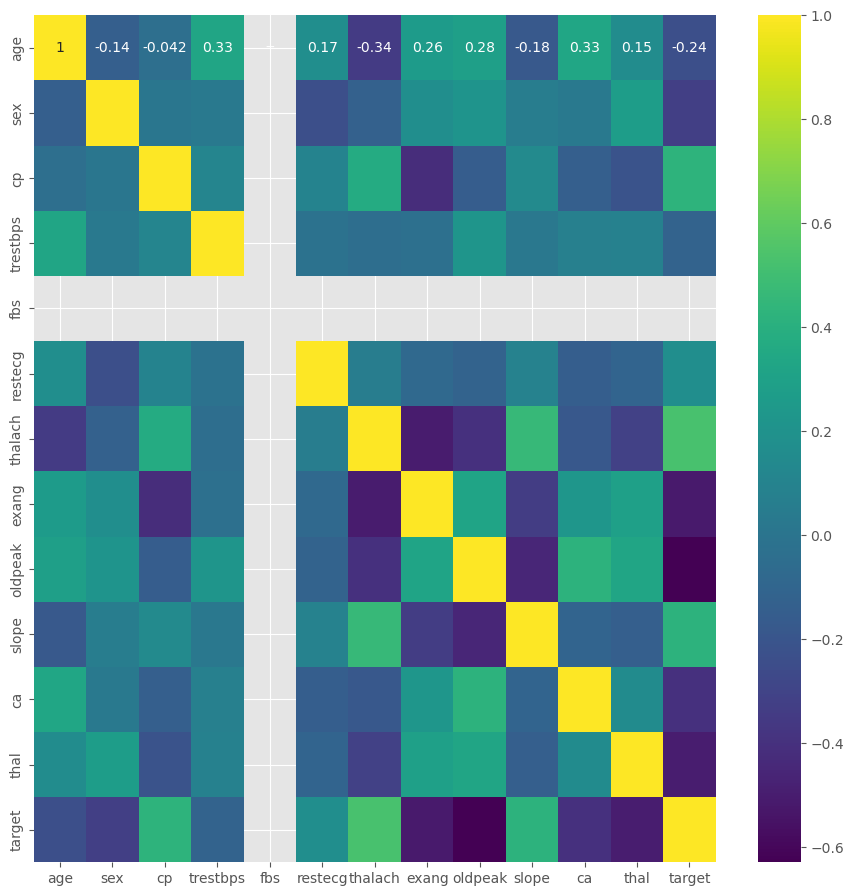

In [22]:
# Heatmap

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df = correlation(dataset=df)
    print('After correlation:', df.shape)
    fig = plt.figure(figsize=(11, 11))
    sns.heatmap(data=df.corr(), cmap='viridis', annot=True, annot_kws={'size':10})
    return df

# Show heatmap after normalized data
df = apply_feature_engineering(df)

In [23]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    # Todo: Select features
    X = df.drop(columns=['target']).values
    # Todo: Select label
    y = np.array(df['target'])
    y = y.reshape((-1, 1))

    print(f'Shape of X: {X.shape}')
    print(f'Shape of y: {y.shape}')
    return X, y

X, y = prepare_X_y(df)

Shape of X: (668, 12)
Shape of y: (668, 1)


# Apply machine learning model

## Train-test split

In [24]:
RANDOM_STATE = 24
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE,
                                                random_state=RANDOM_STATE)
print(f'Shape of X_train: {trainX.shape}')
print(f'Shape of X_test: {testX.shape}')
print(f'Shape of y_train: {trainY.shape}')
print(f'Shape of y_test: {testY.shape}')

Shape of X_train: (534, 12)
Shape of X_test: (134, 12)
Shape of y_train: (534, 1)
Shape of y_test: (134, 1)


## Build SK-learn model

In [25]:
def build_model(X, y, solver: str, penalty: str):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    if penalty == 'elasticnet':
        model = make_pipeline(
            StandardScaler(),
            LogisticRegression(solver=solver, penalty=penalty, l1_ratio=0.5)
        )
    else:
        model = make_pipeline(
            StandardScaler(),
            LogisticRegression(solver=solver, penalty=penalty)
        )
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("Precision: ", precision_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("F1: ", f1_score(y_true, y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))
    print("Classification report: \n", classification_report(y_true , y_pred))
    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true, y_pred)
    return main_score



In [26]:
pair_solver_penalty = {}
pair_solver_penalty['lbfgs'] = ['l2', None]
pair_solver_penalty['liblinear'] = ['l1', 'l2']
pair_solver_penalty['newton-cg'] = ['l2', None]
pair_solver_penalty['newton-cholesky'] = ['l2', None]
pair_solver_penalty['sag'] = ['l2', None]
pair_solver_penalty['saga'] = ['elasticnet', 'l1', 'l2', None]


models = pd.DataFrame(columns=['solver', 'penalty', 'f1_score'])
for solver, penalties in pair_solver_penalty.items():
    for penalty in penalties:
        model = build_model(trainX, trainY, solver, penalty)
        print(f'Solver: {solver}, penalty: {penalty}')
        pred = model.predict(testX)
        f1 = calculate_performance(testY, pred)
        print('_' * 30)
        models = models._append({'solver': solver,
                        'penalty': penalty,
                        'f1_score': f1
                        }, ignore_index=True)

Solver: lbfgs, penalty: l2
Precision:  0.9770114942528736
Recall:  1.0
Accuracy:  0.9850746268656716
F1:  0.9883720930232558
Confusion matrix: 
 [[47  2]
 [ 0 85]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.98      1.00      0.99        85

    accuracy                           0.99       134
   macro avg       0.99      0.98      0.98       134
weighted avg       0.99      0.99      0.99       134

______________________________
Solver: lbfgs, penalty: None
Precision:  0.9770114942528736
Recall:  1.0
Accuracy:  0.9850746268656716
F1:  0.9883720930232558
Confusion matrix: 
 [[47  2]
 [ 0 85]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.98      1.00      0.99        85

    accuracy                           0.99       134
   macro avg       0.99      0.98      0.98 

In [28]:
display(models)

,solver,penalty,f1_score
0,lbfgs,l2,0.988372
1,lbfgs,None,0.988372
2,liblinear,l1,0.988372
3,liblinear,l2,0.988372
4,newton-cg,l2,0.988372
5,newton-cg,None,0.988372
6,newton-cholesky,l2,0.988372
7,newton-cholesky,None,0.988372
8,sag,l2,0.988372
9,sag,None,0.988372


In [27]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return """7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words) \n
        Dựa vào document của Scikit-learn, liblinear dành cho dataset nhỏ, sag và saga sẽ nhanh hơn với dataset lớn.
        Đối với multiclass, chỉ có newton-cg, sag, saga và lbfgs có thể xử lý được
        newton-cholesky phù hợp với dataset có số samples lớn hơn rất nhiều số features
        Còn đối với bài toán của chúng ta, tất cả các solver và các penalty tương ứng (chỉ saga là phù hợp với tất cả penalty)
        đều cho ra một f1_score duy nhất, lớn hơn 0.98 ở test dataset, quá tốt để  phân loại ngoài thực tế\n
        Other conclusion: """


# Conclustion

7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)
        
Dựa vào document của Scikit-learn, liblinear dành cho dataset nhỏ, sag và saga sẽ nhanh hơn với dataset lớn.
Đối với multiclass, chỉ có newton-cg, sag, saga và lbfgs có thể xử lý được,
newton-cholesky phù hợp với dataset có số samples lớn hơn rất nhiều số features.
Còn đối với bài toán của chúng ta, tất cả các solver và các penalty tương ứng (chỉ saga là phù hợp với tất cả penalty)
đều cho ra một f1_score duy nhất, lớn hơn 0.98 ở test dataset, quá tốt để  phân loại ngoài thực tế

 - Other conclusion: 